**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../config_sing.R")))
show_env()

You are in Singularity: singularity_proj_combeffect 
BASE DIRECTORY:     /mount/work 
PATH OF SOURCE:     /mount/work/source 
PATH OF EXECUTABLE: /mount/work/exe 
PATH OF ANNOTATION: /mount/work/annotation 
PATH OF PROJECT:    /mount/project 
PATH OF RESULTS:    /mount/work/out/proj_combeffect_encode_fcc 


## Import

In [2]:
###
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")
fname = "KS91_K562_hg38_ASTARRseq_Depth.GATA1.unstranded.perbase.tsv"
fpath = file.path(fdiry, fname)

dat_astarr_gata1 = read_tsv(fpath, show_col_types = FALSE)
head(dat_astarr_gata1)

Chrom,Loc,Sample,Group,Replicate,Region,Depth,Size,Depth_Norm
<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
chrX,47786400,Input_rep1,Input,rep1,GATA1,0,358823,0
chrX,47786401,Input_rep1,Input,rep1,GATA1,0,358823,0
chrX,47786402,Input_rep1,Input,rep1,GATA1,0,358823,0
chrX,47786403,Input_rep1,Input,rep1,GATA1,0,358823,0
chrX,47786404,Input_rep1,Input,rep1,GATA1,0,358823,0
chrX,47786405,Input_rep1,Input,rep1,GATA1,0,358823,0


## Summarize the ratio

In [18]:
dat = dat_astarr_gata1
dat = dat %>% 
    group_by(Loc, Group) %>% 
    summarize(Value = mean(Depth_Norm), .groups='drop') %>% 
    spread(Group, Value) %>%
    mutate(
        FC1 =  Output     / (Input+1),
        FC2 = (Output+1)  / (Input+1),
        FC3 = (Output+10) / (Input+10)) %>%
    mutate(
        Log2fc2 = log2(FC2),
        Log2fc3 = log2(FC3)
    )

In [19]:
head(dat)

Loc,Input,Output,FC1,FC2,FC3,Log2fc2,Log2fc3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
47786400,0,0,0,1,1,0,0
47786401,0,0,0,1,1,0,0
47786402,0,0,0,1,1,0,0
47786403,0,0,0,1,1,0,0
47786404,0,0,0,1,1,0,0
47786405,0,0,0,1,1,0,0


In [20]:
tail(dat)

Loc,Input,Output,FC1,FC2,FC3,Log2fc2,Log2fc3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
49786744,0,0,0,1,1,0,0
49786745,0,0,0,1,1,0,0
49786746,0,0,0,1,1,0,0
49786747,0,0,0,1,1,0,0
49786748,0,0,0,1,1,0,0
49786749,0,0,0,1,1,0,0


In [24]:
### set bins
#start  = 47786400
#end    = 49786800
start  = 48780000
end    = 48826000
size   = 100
breaks = seq(start, end, size)

### binning the data
df1 = dat
df1$group = cut(df1$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

### summarize the ratio
df1 = df1 %>% 
    group_by(group) %>% 
    summarize(
        Input        = mean(Input),
        Output       = mean(Output),
        FC1_mean     = mean(FC1),
        FC2_mean     = mean(FC2),
        FC3_mean     = mean(FC3),
        Log2fc2_mean = mean(Log2fc2),
        Log2fc3_mean = mean(Log2fc3)) %>%
    mutate(
        FC     = Output / Input,
        Log2fc = log2(Output / Input)) %>%
    na.omit

### separate bin label to left and right bound
df1 = df1 %>% 
    mutate(group = gsub("\\[|\\)", "", group)) %>%
    separate(group, c("Left", "Right")) %>%
    mutate(Left = as.integer(Left), Right = as.integer(Right))

In [25]:
head(df1)

Left,Right,Input,Output,FC1_mean,FC2_mean,FC3_mean,Log2fc2_mean,Log2fc3_mean,FC,Log2fc
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
48780000,48780100,1.601906e-04,1.057994e-04,1.057825e-04,0.9999456,0.9999946,-7.845936e-05,-7.846883e-06,0.6604596,-0.59845773
48780100,48780200,1.261980e-04,1.066812e-04,1.066678e-04,0.9999805,0.9999980,-2.815333e-05,-2.815638e-06,0.8453482,-0.24238247
48780200,48780300,7.800204e-05,6.903836e-05,6.903293e-05,0.9999910,0.9999991,-1.293099e-05,-1.293177e-06,0.8850841,-0.17611361
48780300,48780400,8.148901e-05,7.909503e-05,7.908861e-05,0.9999976,0.9999998,-3.453586e-06,-3.453761e-07,0.9706221,-0.04301842
48780400,48780500,7.278398e-05,9.497782e-05,9.497088e-05,1.0000222,1.0000022,3.201624e-05,3.201868e-06,1.3049276,0.38396978
48780500,48780600,7.536437e-05,9.561714e-05,9.560994e-05,1.0000203,1.0000020,2.921607e-05,2.921832e-06,1.2687313,0.34338661


In [26]:
tail(df1)

Left,Right,Input,Output,FC1_mean,FC2_mean,FC3_mean,Log2fc2_mean,Log2fc3_mean,FC,Log2fc
<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
48825400,48825500,1.183174e-04,8.994002e-05,8.992936e-05,0.9999716,0.9999972,-4.093567e-05,-4.093949e-06,0.7601588,-0.39562724
48825500,48825600,1.148624e-04,1.032170e-04,1.032051e-04,0.9999884,0.9999988,-1.679892e-05,-1.680050e-06,0.8986148,-0.15422522
48825600,48825700,1.138684e-04,1.119938e-04,1.119811e-04,0.9999981,0.9999998,-2.704142e-06,-2.704418e-07,0.9835373,-0.02394833
48825700,48825800,9.533056e-05,7.664373e-05,7.663638e-05,0.9999813,0.9999981,-2.695717e-05,-2.695917e-06,0.8039786,-0.31477099
48825800,48825900,9.475647e-05,7.033054e-05,7.032388e-05,0.9999756,0.9999976,-3.523628e-05,-3.523888e-06,0.7422242,-0.43007313
48825900,48826000,1.112063e-04,6.301744e-05,6.301042e-05,0.9999518,0.9999952,-6.951578e-05,-6.952125e-06,0.5666714,-0.81941569


In [27]:
### create figure
dat = df1

gp11 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC1_mean)) +
    labs(y="Mean(FC)", title="ATAC-STARR (FC = Output / (Input+1))") +
    theme_cowplot()

gp12 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC2_mean)) +
    labs(y="Mean(FC)", title="ATAC-STARR (FC = (Output+1) / (Input+1))") +
    theme_cowplot()

gp13 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Log2fc2_mean)) +
    labs(y="Mean(Log2(FC))", title="ATAC-STARR (FC = (Output+1) / (Input+1))") +
    theme_cowplot()

gp14 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC3_mean)) +
    labs(y="Mean(FC)", title="ATAC-STARR (FC = (Output+10) / (Input+10))") +
    theme_cowplot()

gp15 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Log2fc3_mean)) +
    labs(y="Mean(Log2(FC))", title="ATAC-STARR (FC = (Output+10) / (Input+10))") +
    theme_cowplot()


gp16 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC)) +
    labs(y="FC", title="ATAC-STARR") +
    theme_cowplot()
        
gp17 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Log2fc)) +
    labs(y="Log2(FC)", title="ATAC-STARR") +
    theme_cowplot()

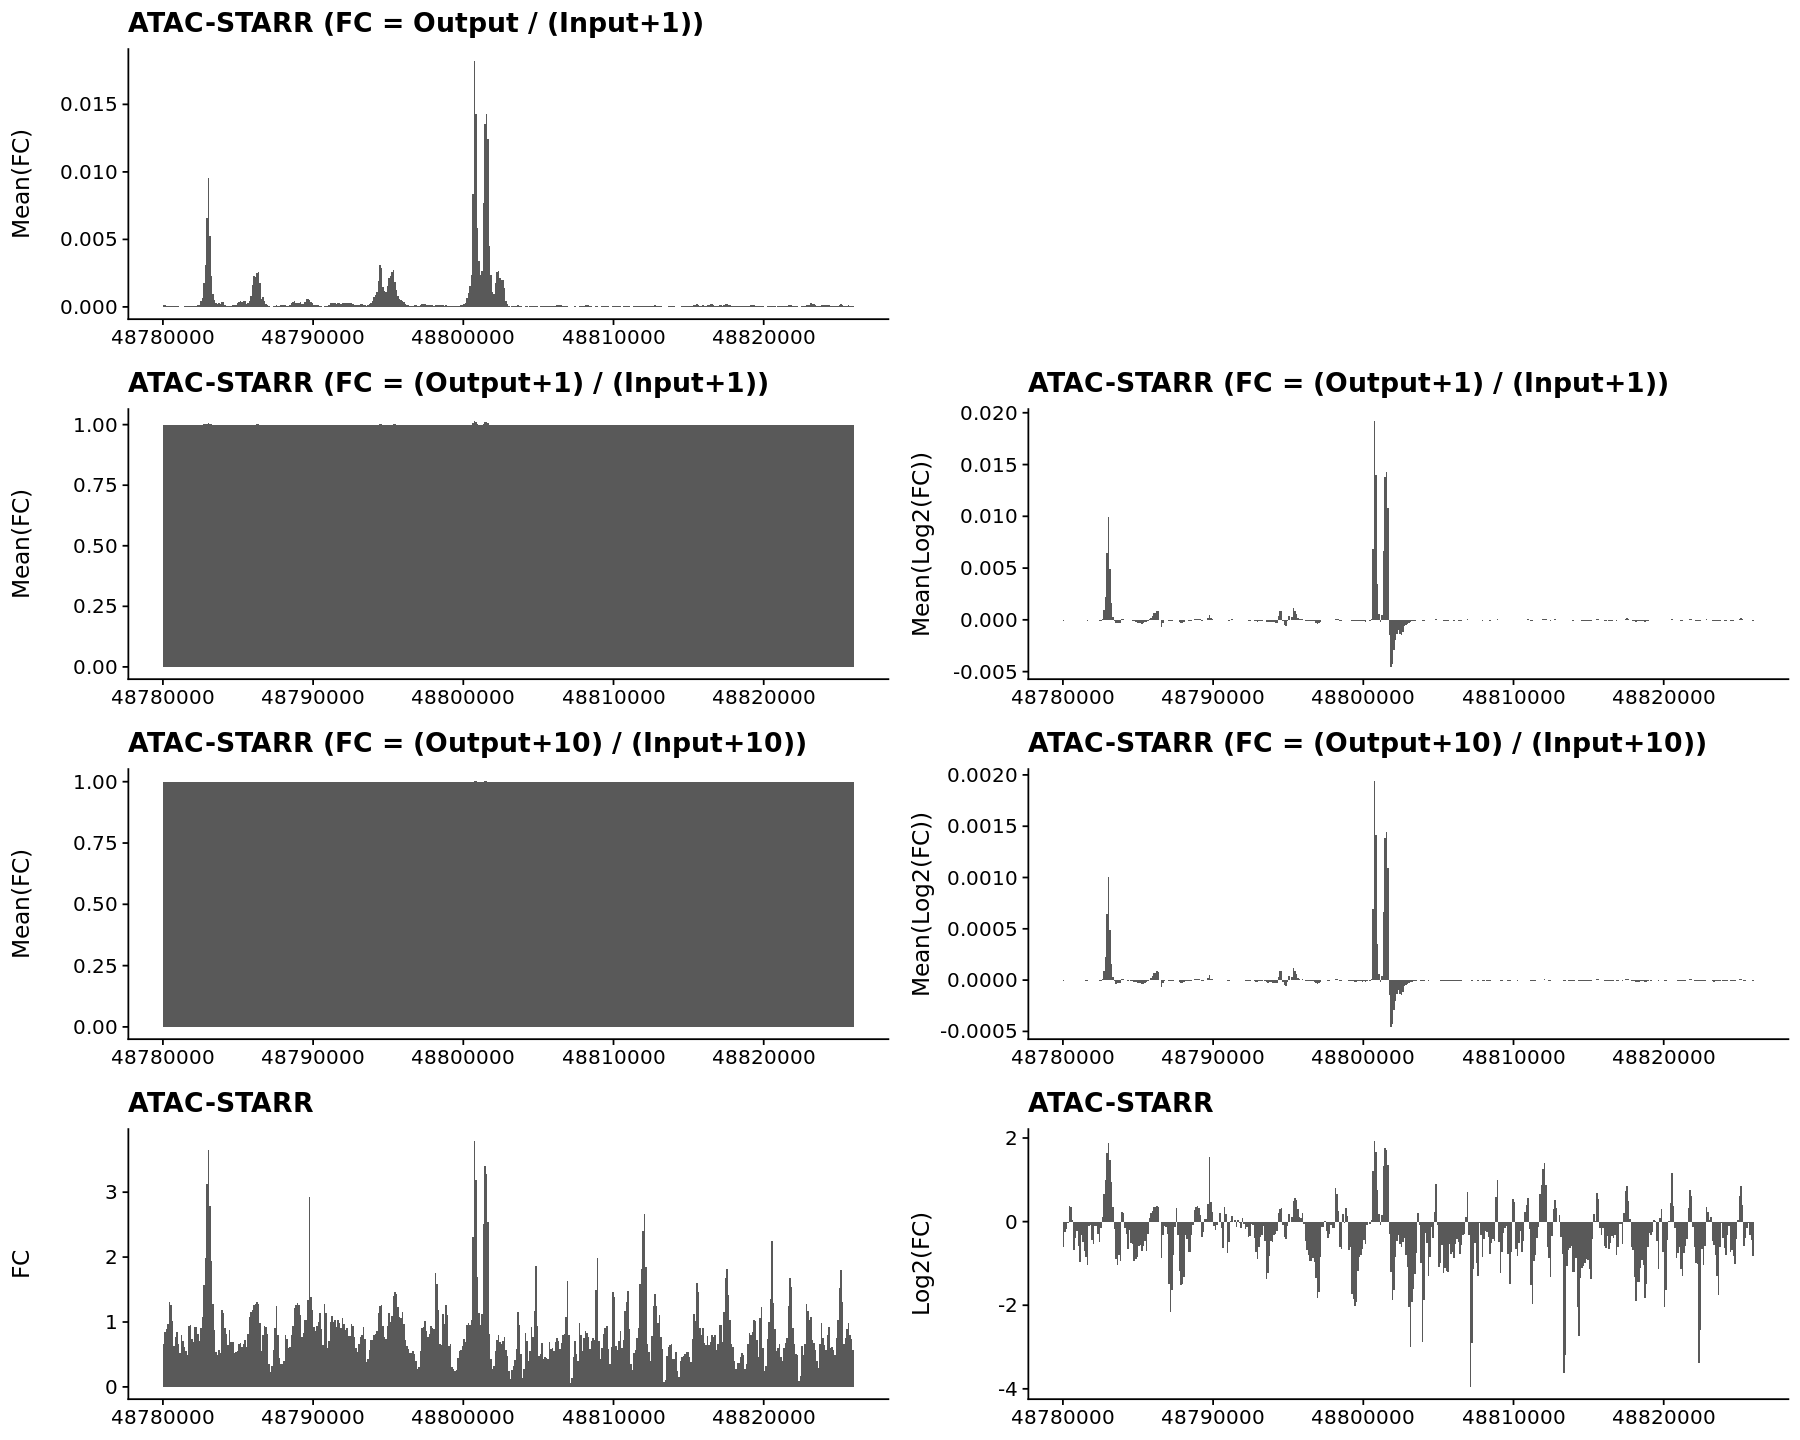

In [28]:
options(repr.plot.height=12, repr.plot.width=15)
plot_grid(
    gp11,
    NULL,
    gp12,
    gp13,
    gp14,
    gp15,
    gp16,
    gp17,
    align="v",  
    nrow=4)

## ATAC-STARR

In [2]:
###
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "fragment")
fname = "library_size.tsv"
fpath = file.path(fdiry, fname)

dat_lib = read_tsv(fpath, show_col_types = FALSE)
head(dat_lib)

Sample,Group,Replicate,Size
<chr>,<chr>,<chr>,<dbl>
Input_rep1,Input,rep1,358823
Input_rep2,Input,rep2,461577
Input_rep3,Input,rep3,496229
Input_rep4,Input,rep4,464845
Input_rep5,Input,rep5,454013
Input_rep6,Input,rep6,409058


In [3]:
### init: file directory
fdiry = file.path(FD_RES, "KS91_K562_ASTARRseq", "coverage")

### init:
ctypes = c(col_character(), col_integer(), col_integer())
cnames = c("Chrom", "Loc", "Depth")

### INPUT: set sample group and number of replicates
GROUP   = "Input"
REPLICS = paste0("rep", 1:6)

### INPUT: import data
lst_dat_inp = lapply(REPLICS, function(replic){
    ### get sample file path
    sam   = paste(GROUP, replic, sep="_")
    fglob = paste0("*", sam, "*", "perbase.tsv.gz")
    fpath = Sys.glob(file.path(fdiry, fglob))
    
    ### read data
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sam
    return(dat)
})

### OUTPUT: set sample group and number of replicates
GROUP   = "Output"
REPLICS = paste0("rep", 1:4)

### OUTPUT: import data
lst_dat_out = lapply(REPLICS, function(replic){
    ### get sample file path
    sam   = paste(GROUP, replic, sep="_")
    fglob = paste0("*", sam, "*", REGION, "*", "perbase.tsv.gz")
    fpath = Sys.glob(file.path(fdiry, fglob))
    
    ### read data
    dat = read_tsv(
        fpath, 
        col_types = ctypes, 
        col_names = cnames)
    dat$Sample = sam
    return(dat)
})

In [4]:
### summarize
dat = bind_rows(lst_dat_inp, lst_dat_out) %>% 
    left_join(dat_lib, by="Sample") %>%
    mutate(Depth_Norm = Depth / Size)
print(head(dat))

dat = dat %>% 
    group_by(Loc, Group) %>% 
    summarize(Value = mean(Depth_Norm), .groups='drop') %>% 
    spread(Group, Value) %>%
    mutate(
        FC1 =  Output     / (Input+1),
        FC2 = (Output+1)  / (Input+1),
        FC3 = (Output+10) / (Input+10)) %>%
    mutate(
        Log2fc2 = log2(FC2),
        Log2fc3 = log2(FC3)
    )
        
### assign
dat_astarr = dat
print(dim(dat_astarr))
head(dat_astarr)

# A tibble: 6 × 8
  Chrom      Loc Depth Sample     Group Replicate   Size Depth_Norm
  <chr>    <dbl> <dbl> <chr>      <chr> <chr>      <dbl>      <dbl>
1 chrX  47786400     0 Input_rep1 Input rep1      358823          0
2 chrX  47786401     0 Input_rep1 Input rep1      358823          0
3 chrX  47786402     0 Input_rep1 Input rep1      358823          0
4 chrX  47786403     0 Input_rep1 Input rep1      358823          0
5 chrX  47786404     0 Input_rep1 Input rep1      358823          0
6 chrX  47786405     0 Input_rep1 Input rep1      358823          0
[1] 2000350       8


Loc,Input,Output,FC1,FC2,FC3,Log2fc2,Log2fc3
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
47786400,0,0,0,1,1,0,0
47786401,0,0,0,1,1,0,0
47786402,0,0,0,1,1,0,0
47786403,0,0,0,1,1,0,0
47786404,0,0,0,1,1,0,0
47786405,0,0,0,1,1,0,0


## Tiling MPRA

In [5]:
### init: set file directory and path
fdiry = file.path(FD_RES, "Tewhey_K562_TileMPRA", "count")
fname = "Tile_K562_20210130.GATA1.unstranded.bed"
fpath = file.path(fdiry, fname)

### init: set column names
cnames = c("Chrom", "Start", "End", "ID", "Score", "Strand", 
           "log2fc", "Input_Count", "Output_Count", 
           "log10pval", "log10fdr", "lfc-se")

### import data
dat = read_tsv(fpath, col_names = cnames, show_col_types = FALSE)
dat = dat %>% mutate(Loc = (Start + End) / 2)

### assign
dat_tmpra = dat
print(dim(dat_tmpra))
head(dat_tmpra)

[1] 52312    13


Chrom,Start,End,ID,Score,Strand,log2fc,Input_Count,Output_Count,log10pval,log10fdr,lfc-se,Loc
<chr>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
chrX,47786401,47786600,X:47786401-47786600,.,+,2.30593934,2117.787,10474.869,112.1126526,110.93113079,0.10214790,47786500
chrX,47786451,47786650,X:47786451-47786650,.,+,0.78305606,1386.007,2387.119,11.3173884,10.64251685,0.11330705,47786550
chrX,47786501,47786700,X:47786501-47786700,.,+,-0.12873196,1955.626,1788.236,0.8450697,0.62872262,0.08785968,47786600
chrX,47786551,47786750,X:47786551-47786750,.,+,0.58829515,2388.997,3591.264,11.2404554,10.56667887,0.08543661,47786650
chrX,47786601,47786800,X:47786601-47786800,.,+,0.06670014,2102.916,2202.385,0.3095900,0.21047015,0.09667741,47786700
chrX,47786651,47786850,X:47786651-47786850,.,+,-0.02967703,1571.259,1537.475,0.1009399,0.06453099,0.11287406,47786750


## Summarize Ratio

In [6]:
### set bins
start  = 48780000
end    = 48826000
size   = 100
breaks = seq(start, end, size)

### binning the data
df1 = dat_astarr
df1$group = cut(df1$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

df2 = dat_tmpra 
df2$group = cut(df2$Loc, breaks=breaks, right = FALSE, dig.lab = 10)

### summarize the ratio
df1 = df1 %>% 
    group_by(group) %>% 
    summarize(
        Input        = mean(Input),
        Output       = mean(Output),
        FC1_mean     = mean(FC1),
        FC2_mean     = mean(FC2),
        FC3_mean     = mean(FC3),
        Log2fc2_mean = mean(Log2fc2),
        Log2fc3_mean = mean(Log2fc3)) %>%
    mutate(
        FC     = Output / Input,
        Log2fc = log2(Output / Input)) %>%
    na.omit

df2 = df2 %>% 
    group_by(group) %>%
    summarize(
        Input   = mean(Input_Count),
        Output  = mean(Output_Count),
        FC_mean = mean(2^log2fc),
        Log2fc_mean = mean(log2fc)) %>%
    mutate(
        FC     = Output / Input,
        Log2fc = log2(Output / Input)) %>%
    na.omit

### separate bin label to left and right bound
df1 = df1 %>% 
    mutate(group = gsub("\\[|\\)", "", group)) %>%
    separate(group, c("Left", "Right")) %>%
    mutate(Left = as.integer(Left), Right = as.integer(Right))

df2 = df2 %>% 
    mutate(group = gsub("\\[|\\)", "", group)) %>%
    separate(group, c("Left", "Right")) %>%
    mutate(Left = as.integer(Left), Right = as.integer(Right))

### show results
cat("ASTARR", dim(df1), "\n")
print(head(df1, 3))
cat("\n")
cat("Tiling MPRA", dim(df2), "\n")
print(head(df2, 3))

ASTARR 460 11 
# A tibble: 3 × 11
      Left    Right     Input    Output  FC1_mean FC2_mean FC3_mean Log2fc2_mean
     <int>    <int>     <dbl>     <dbl>     <dbl>    <dbl>    <dbl>        <dbl>
1 48780000 48780100 0.000160  0.000106  0.000106      1.00     1.00   -0.0000785
2 48780100 48780200 0.000126  0.000107  0.000107      1.00     1.00   -0.0000282
3 48780200 48780300 0.0000780 0.0000690 0.0000690     1.00     1.00   -0.0000129
# … with 3 more variables: Log2fc3_mean <dbl>, FC <dbl>, Log2fc <dbl>

Tiling MPRA 459 8 
# A tibble: 3 × 8
      Left    Right Input Output FC_mean Log2fc_mean    FC  Log2fc
     <int>    <int> <dbl>  <dbl>   <dbl>       <dbl> <dbl>   <dbl>
1 48780000 48780100  390.   382.   1.00      -0.0100 0.978 -0.0326
2 48780100 48780200  633.   705.   1.17       0.192  1.11   0.155 
3 48780200 48780300  163.   166.   0.841     -0.308  1.02   0.0238


In [7]:
### create figure
dat = df1

gp11 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC1_mean)) +
    labs(y="Mean(FC)", title="ATAC-STARR (FC = Output / (Input+1))") +
    theme_cowplot()

gp12 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC2_mean)) +
    labs(y="Mean(FC)", title="ATAC-STARR (FC = (Output+1) / (Input+1))") +
    theme_cowplot()

gp13 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Log2fc2_mean)) +
    labs(y="Mean(Log2(FC))", title="ATAC-STARR (FC = (Output+1) / (Input+1))") +
    theme_cowplot()

gp14 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC3_mean)) +
    labs(y="Mean(FC)", title="ATAC-STARR (FC = (Output+10) / (Input+10))") +
    theme_cowplot()

gp15 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Log2fc3_mean)) +
    labs(y="Mean(Log2(FC))", title="ATAC-STARR (FC = (Output+10) / (Input+10))") +
    theme_cowplot()


gp16 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC)) +
    labs(y="FC", title="ATAC-STARR") +
    theme_cowplot()
        
gp17 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Log2fc)) +
    labs(y="Log2(FC)", title="ATAC-STARR") +
    theme_cowplot()

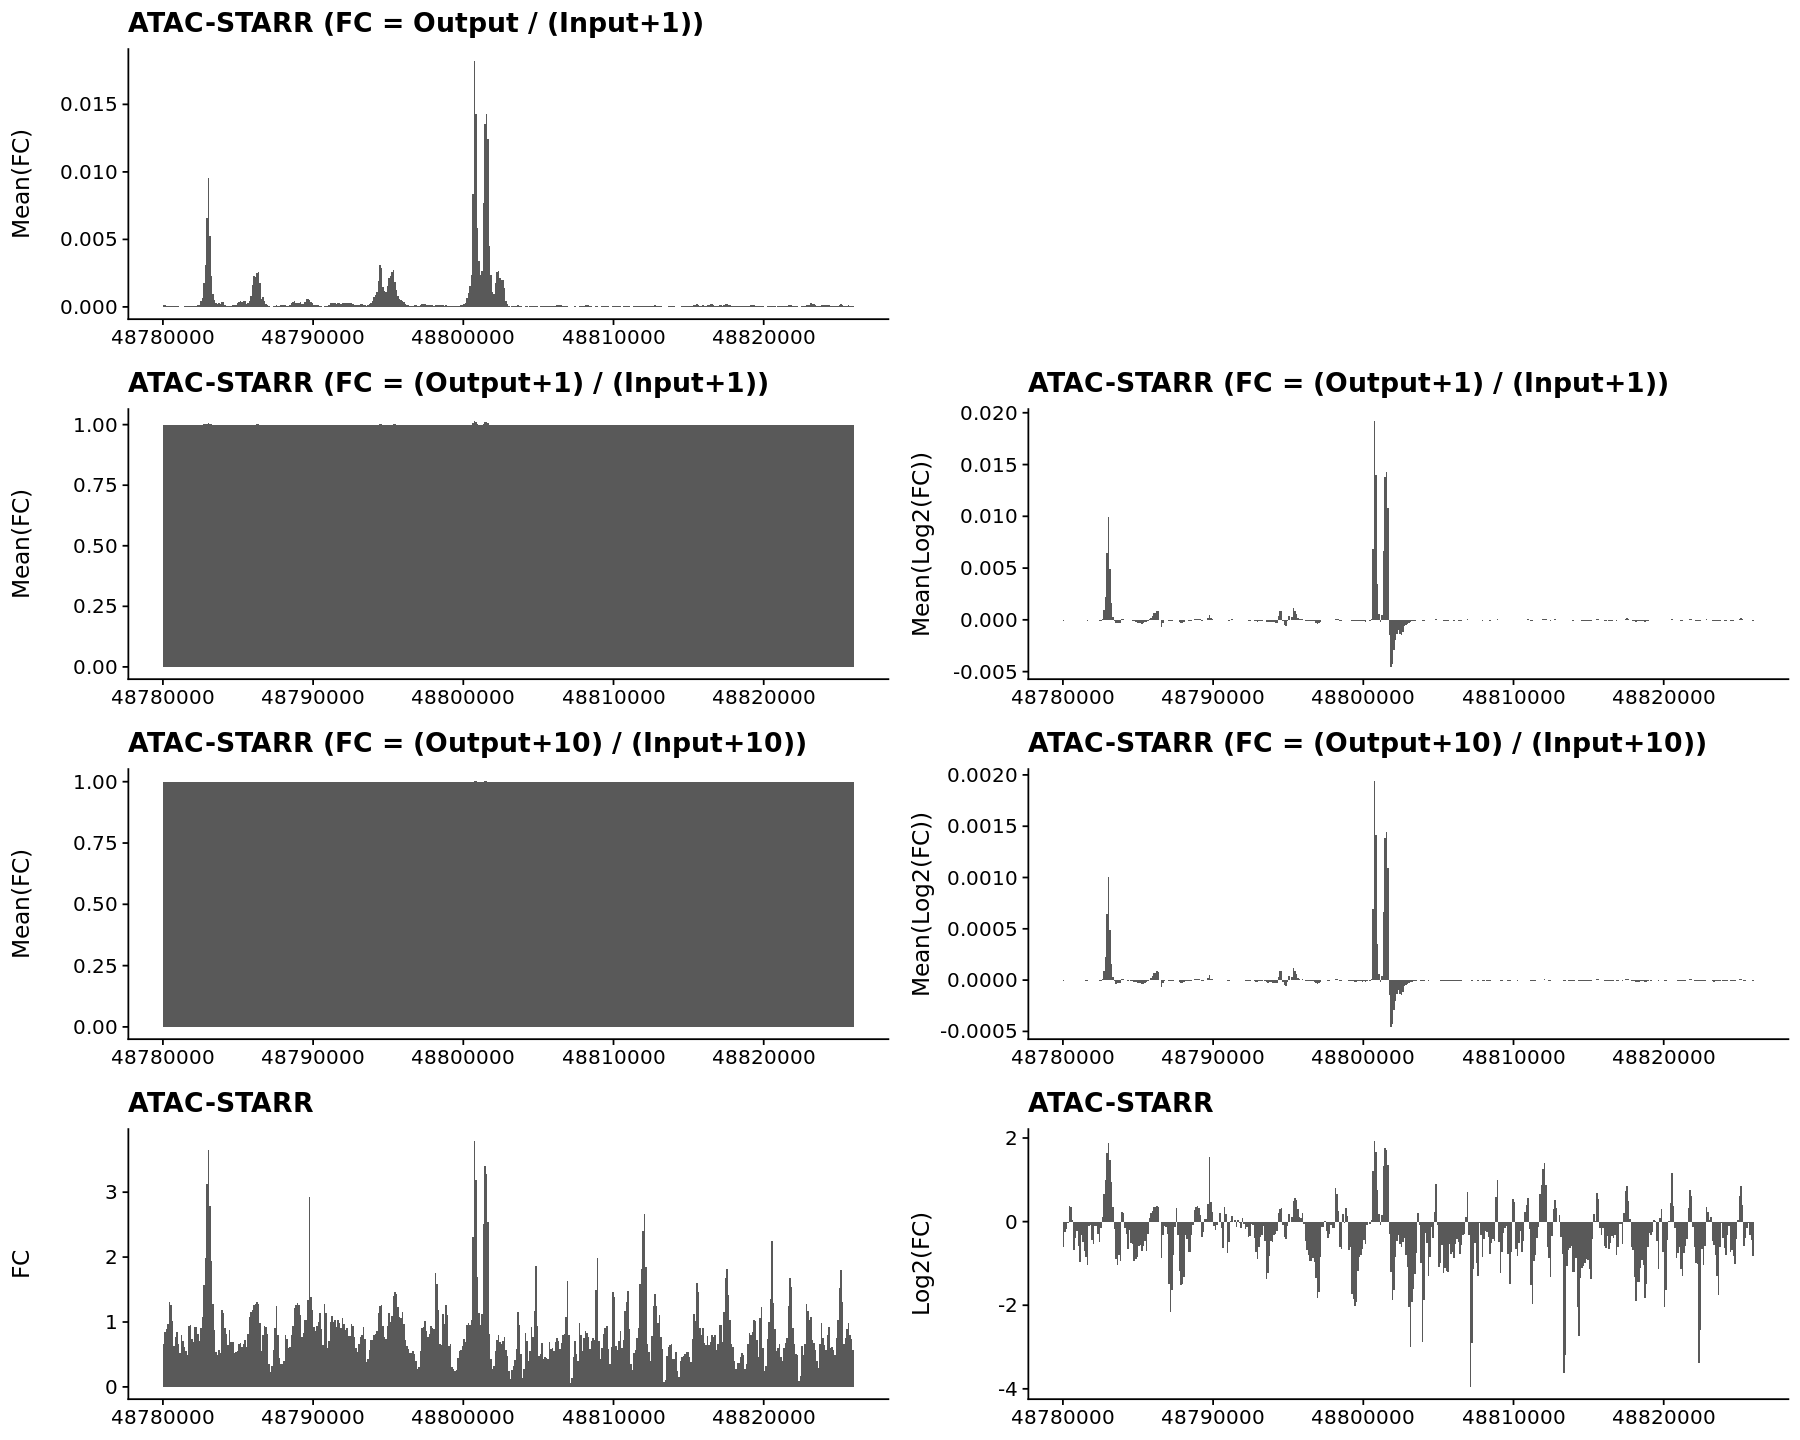

In [8]:
options(repr.plot.height=12, repr.plot.width=15)
plot_grid(
    gp11,
    NULL,
    gp12,
    gp13,
    gp14,
    gp15,
    gp16,
    gp17,
    align="v",  
    nrow=4)

In [9]:
### create figure
dat = df2

gp21 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC_mean)) +
    labs(y="Mean(FC)", title="Tiling MPRA") +
    theme_cowplot()

gp22 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Log2fc_mean)) +
    labs(y="Mean(Log2fc)", title="Tiling MPRA") +
    theme_cowplot()

gp23 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=FC)) +
    labs(y="FC", title="Tiling MPRA") +
    theme_cowplot()

gp24 = ggplot(dat) + 
    geom_rect(
        mapping=aes(
            xmin=Left, 
            xmax=Right, 
            ymin=0, 
            ymax=Log2fc)) +
    labs(y="Log2fc", title="Tiling MPRA") +
    theme_cowplot()

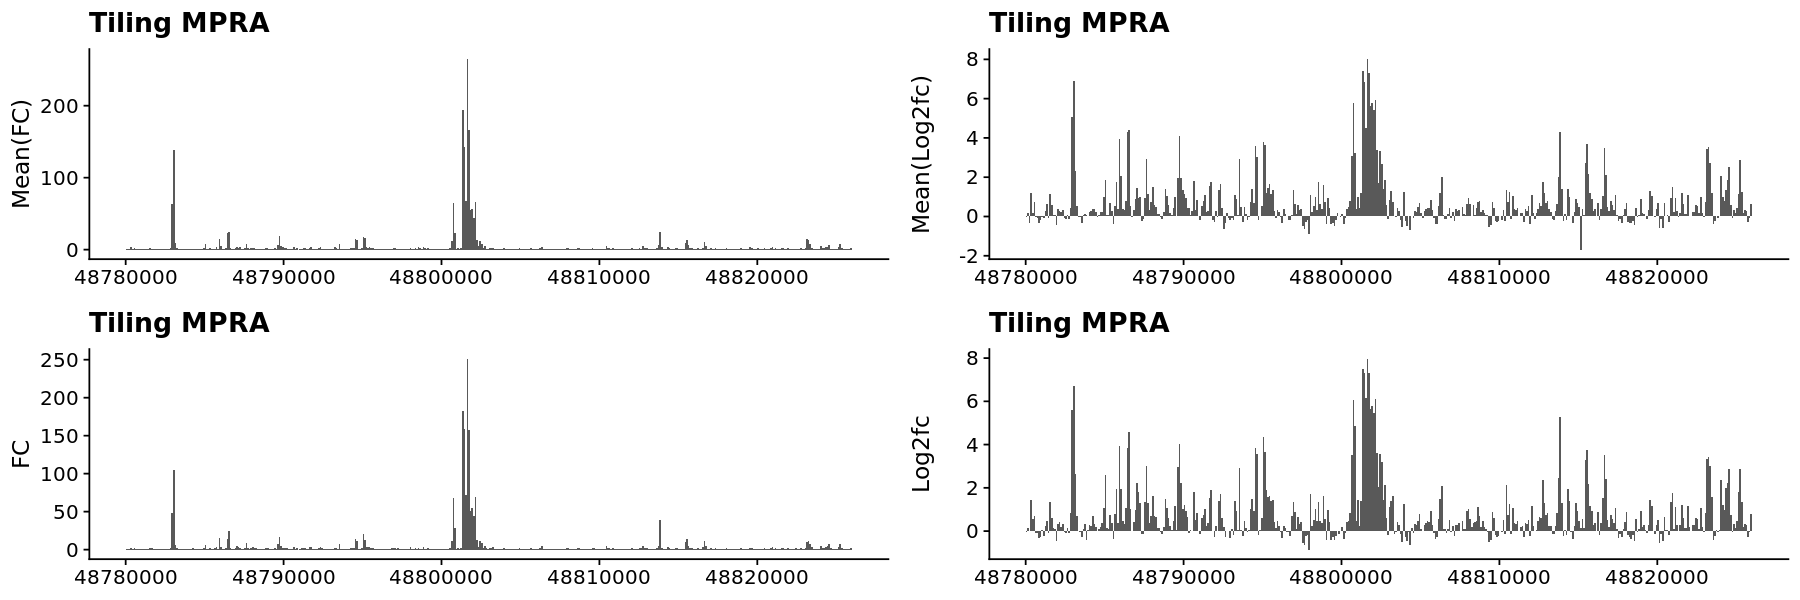

In [10]:
options(repr.plot.height=5, repr.plot.width=15)
plot_grid(
    gp21,# + ylim(0, 3000), 
    gp22,# + ylim(0, 10), 
    gp23,
    gp24,
    align="v", 
    nrow=2, 
    ncol=2)

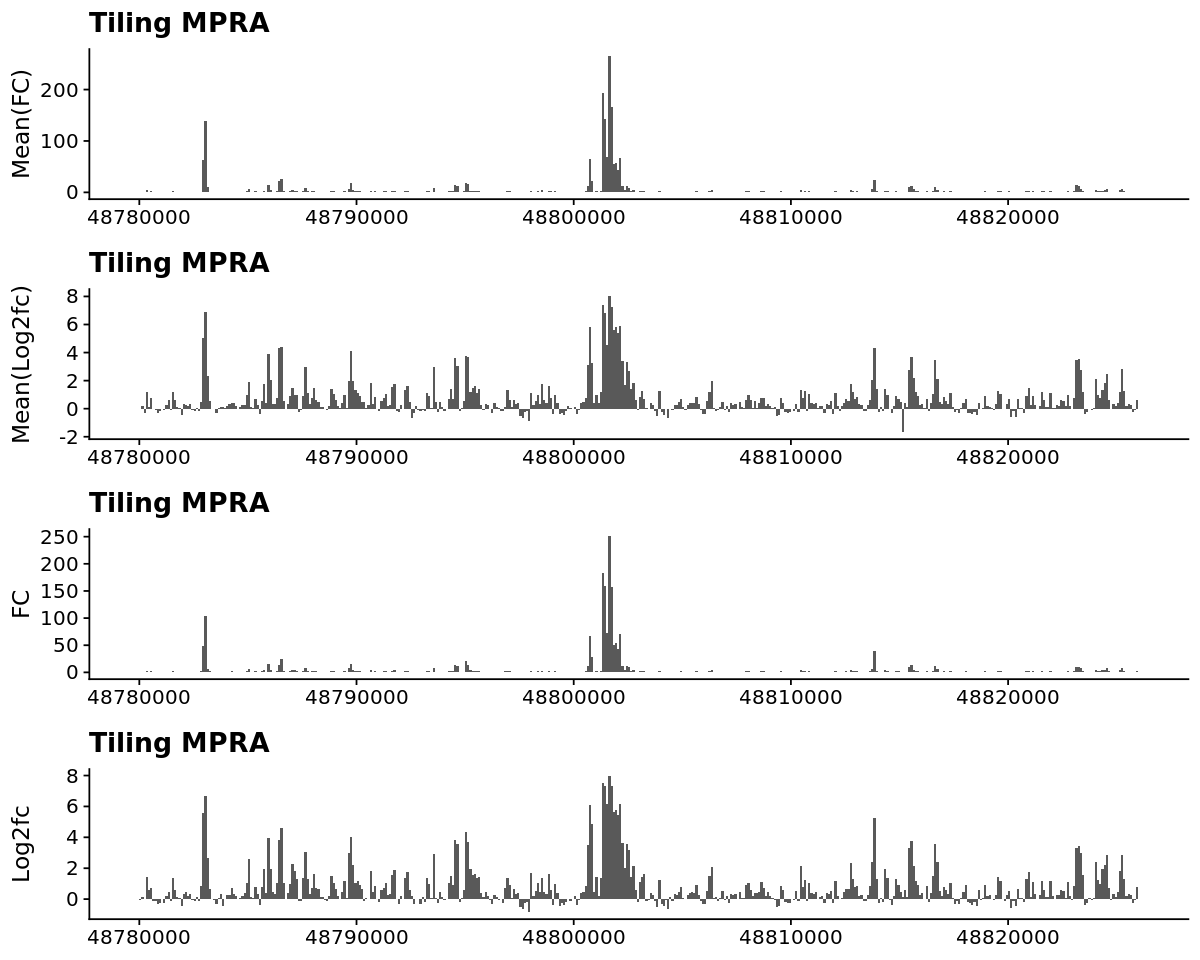

In [11]:
options(repr.plot.height=8, repr.plot.width=10)
plot_grid(
    gp21,# + ylim(0, 3000), 
    gp22,# + ylim(0, 10), 
    gp23,
    gp24,
    align="v", 
    nrow=4, 
    ncol=1)